### VLM-driven self-reflection for automated plot evaluations

By setting `evaluate_plots=True`, the plot judge agent is triggered whenever the engineer agent generates a plot. First, an LLM analyzes the task context and produces domain-specific visual “priors” — a list of expected features, numerical ranges, and scientific constraints. The VLM then evaluates the plot against both these priors and general plotting standards, issuing a verdict of **continue** or **retry**.

In the example below, the plot judge agent flagged two issues with the CMB TT power-spectrum plot: the y-axis scale was off by orders of magnitude, and the acoustic-peak positions and amplitudes didn’t match Planck 2018 ΛCDM expectations. The plot judge returned a structured “retry” verdict. 

The plot debugger agent then inspected that verdict alongside the code that produced the plot, discovered that the factor $\ell(\ell+1)/(2\pi)$ had been applied twice (affecting both scale and shape), pinpointed the problematic lines in the script, and handed back a concise list of targeted fixes to the engineer agent.

After one multi-agent feedback loop, the engineer agent was able to a create an accurate CMB power-spectrum plot.

In [2]:
import cmbagent
from PIL import Image

In [ ]:
task= r"""  
Using CAMB, compute the lensed CMB temperature-temperature (TT) power spectrum with the Planck 2018 best-fit ΛCDM parameters.
Plot $D_\ell \equiv \frac{\ell(\ell+1)}{2\pi} \, C_\ell^{TT}$ for multipoles $2 \le \ell \le 2500$ on linear-linear axes with units μK².
"""

result = cmbagent.one_shot(
    task=task,    
    evaluate_plots=True,
)

  
Using CAMB, compute the lensed CMB temperature–temperature (TT) power spectrum with the Planck 2018 best‑fit ΛCDM parameters.
Plot $D_\ell \equiv \frac{\ell(\ell+1)}{2\pi} \, C_\ell^{TT}$ for multipoles $2 \le \ell \le 2500$ on linear–linear axes with units μK².


--------------------------------------------------------------------------------

Calling engineer...

             Model    agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 engineer 0.01304           1754               1192          2946
**Code Explanation:**

This code uses the CAMB Python package to compute the lensed CMB temperature–temperature (TT) power spectrum using the Planck 2018 best-fit ΛCDM parameters. It calculates the lensed $C_\ell^{TT}$ for $2 \leq \ell \leq 2500$, computes $D_\ell = \ell(\ell+1)C_\ell^{TT}/(2\pi)$, and plots $D_\ell$ (in $\mu$K$^2$) versus $\ell$ on linear axes. The plot is saved as a high-resolution PNG in the `data/` directory, and the numerical data is a

/Users/kahaan/Downloads/cmbagent/cmbagent/../output/codebase/camb_lensed_cmb_tt.py:64: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel("Multipole $\ell$")


             Model      agent    Cost  Prompt Tokens  Completion Tokens  Total Tokens
gpt-4.1-2025-04-14 terminator 0.01011           5053                  1          5054

--------------------------------------------------------------------------------
Session terminated.

--------------------------------------------------------------------------------

Displaying cost…

| Agent                       | Cost ($)    | Prompt Tokens | Completion Tokens | Total Tokens |
|:----------------------------|------------:|--------------:|------------------:|-------------:|
| executor response formatter | $0.00605880 |          4808 |               175 |         4983 |
| plot judge                  | $0.02098510 |         11015 |               887 |        11902 |
| engineer response formatter | $0.01659790 |          3817 |              2818 |         6635 |
| terminator                  | $0.01011400 |          5053 |                 1 |         5054 |
| plot debugger               | $0.00698750

First agent-generated plot (incorrect):

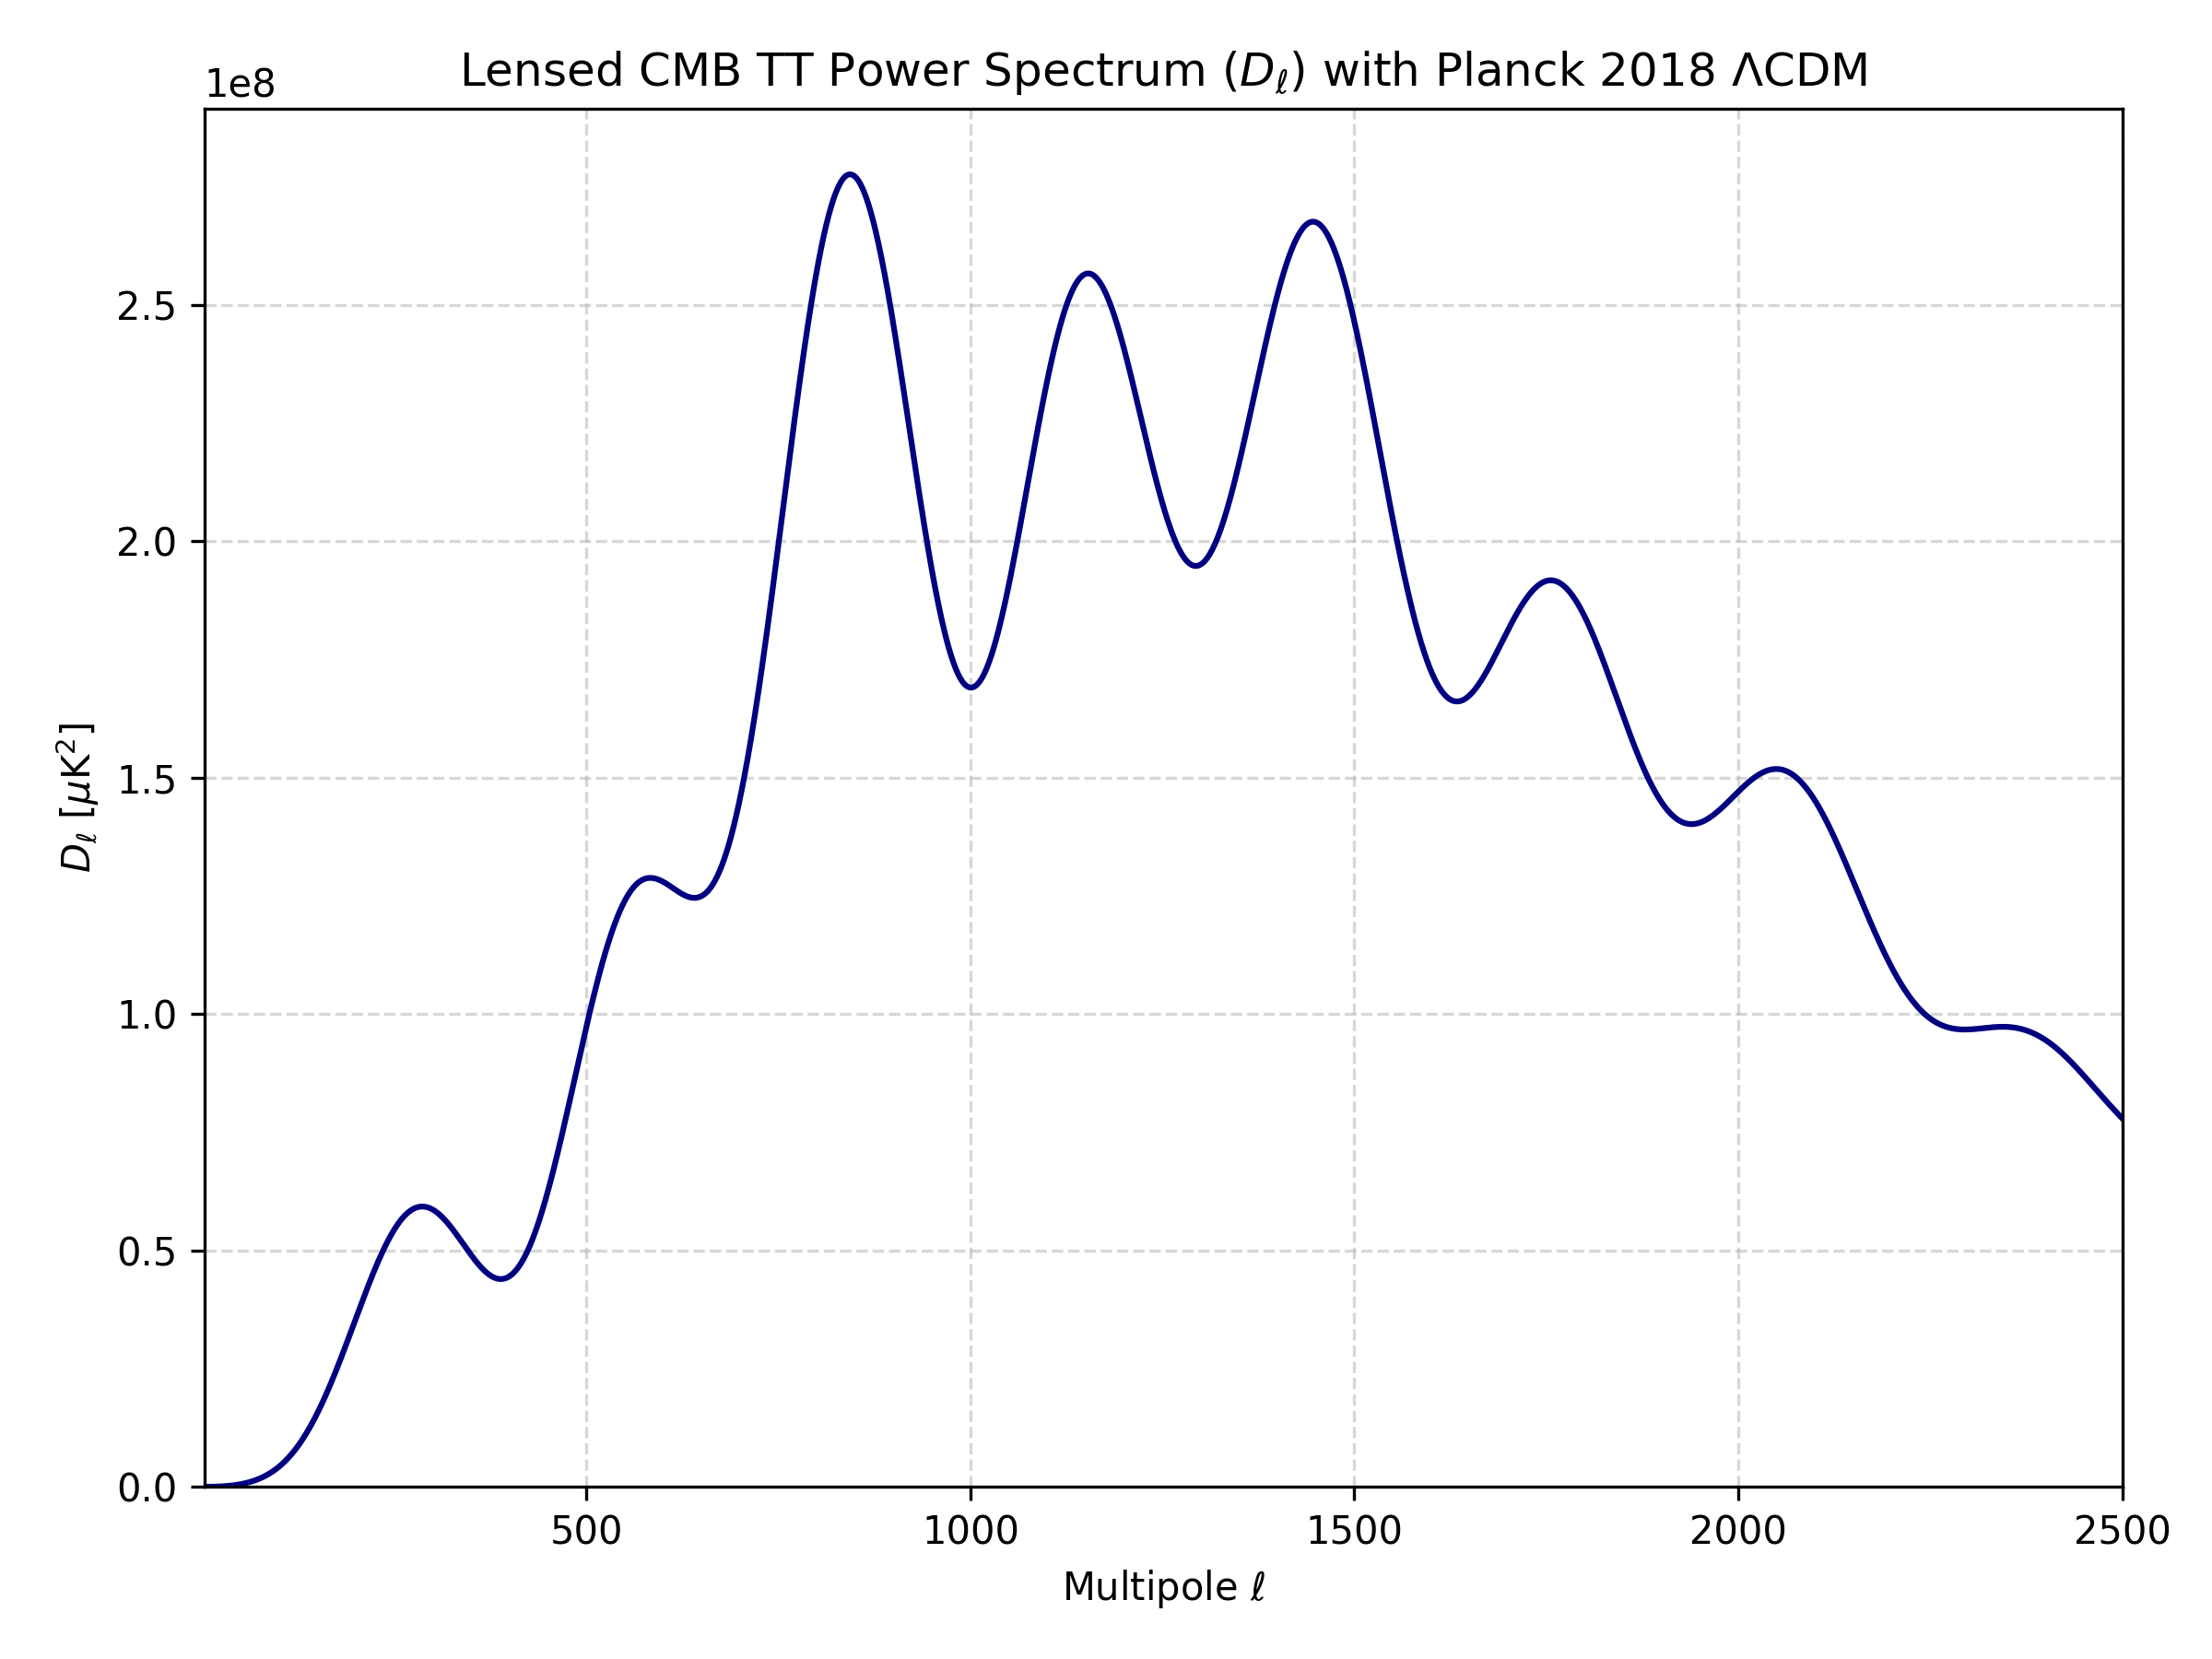

In [8]:
first_img_path = result['final_context'].data['displayed_images'][-2]
Image.open(first_img_path)

Second agent-generated plot (corrected)

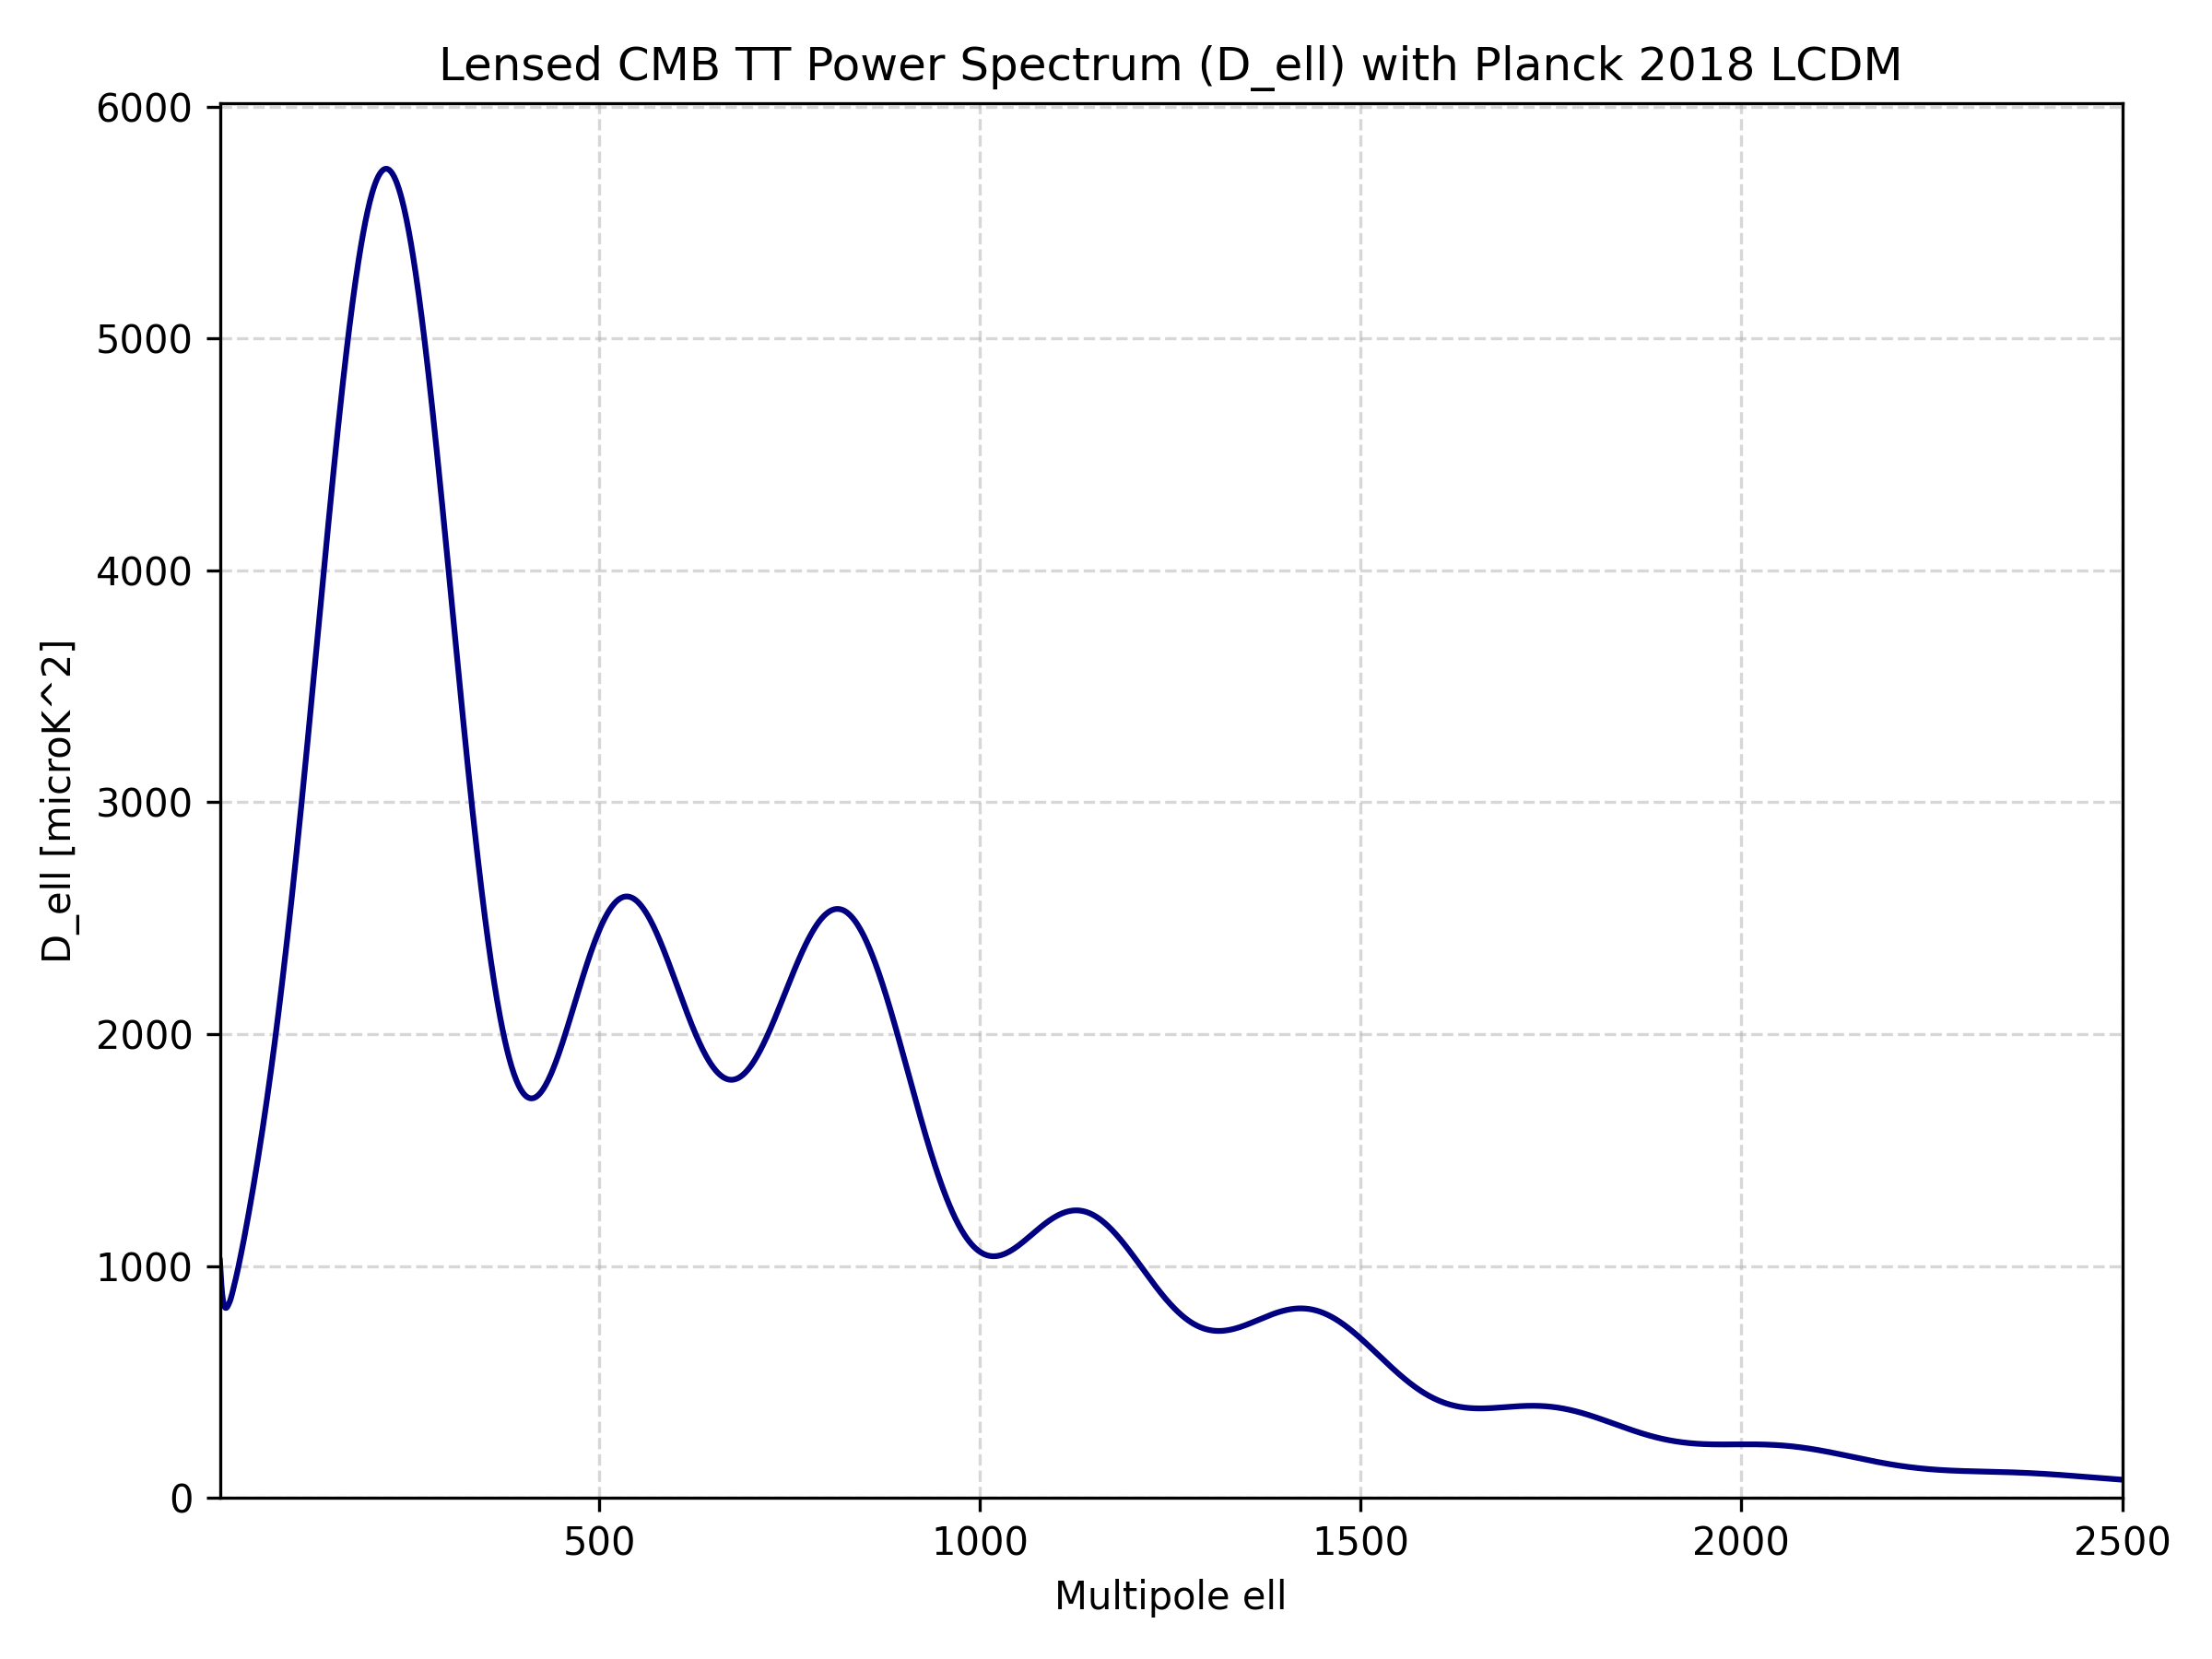

In [9]:
final_img_path = result['final_context'].data['displayed_images'][-1]
Image.open(final_img_path)